<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Updated_Bank_Original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**---------------------------BANKING PROJECT------------------**
**-------------------Analysis by ROSHAN KUMAR----------------**

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.**

In [ ]:
# importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bank-full.csv',sep = ';')
df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
print('number of rows and columns = ',df.shape)

number of rows and columns =  (45211, 17)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


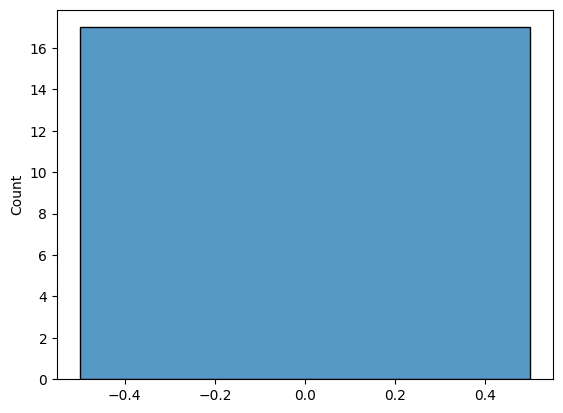

In [ ]:
#finding missing
print(df.isnull().sum())
sns.histplot(df.isnull().sum());

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As observed above balance ,duration, pdays, previous has sudden jump in the value from 75% to 100% which shows some anamolies.

In [ ]:
#checking datatype
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**DATA PREPROCESSING**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


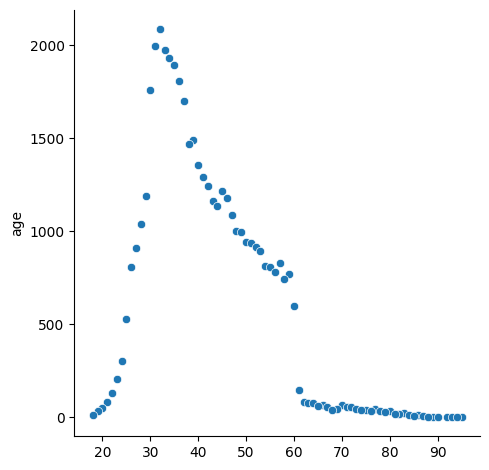

In [ ]:
sns.relplot(df.age.value_counts())
print(df.age.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<Axes: >

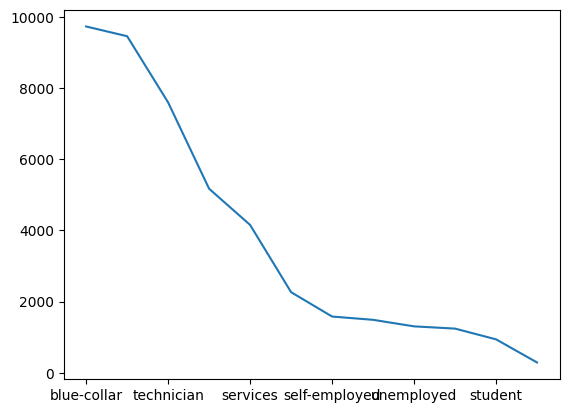

In [ ]:
print(df.job.value_counts())
df.job.value_counts().plot()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<Axes: xlabel='marital', ylabel='Count'>

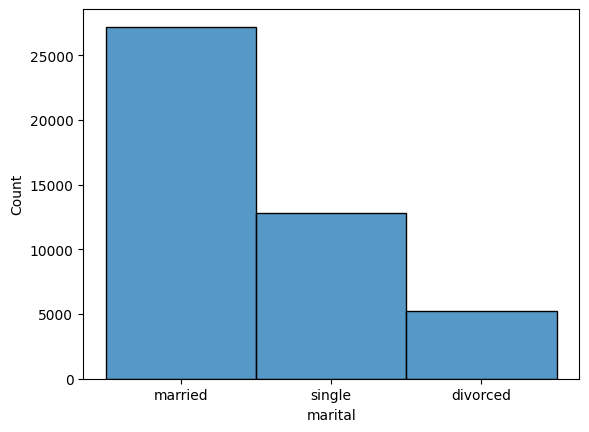

In [ ]:
print(df.marital.value_counts())
sns.histplot(df['marital'],)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


<Axes: xlabel='education', ylabel='Count'>

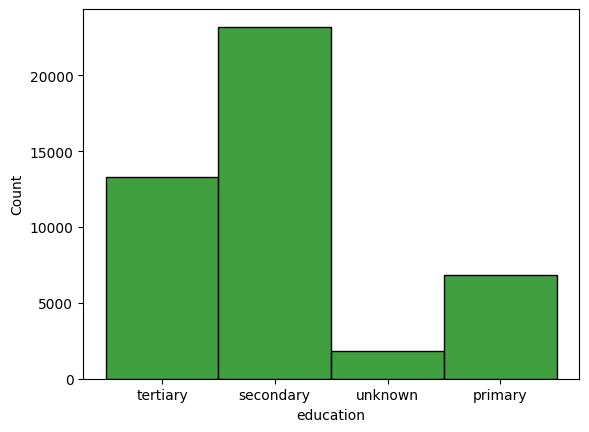

In [ ]:
print(df.education.value_counts())
sns.histplot(df['education'],color = 'green')

yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64


<Axes: xlabel='loan', ylabel='Count'>

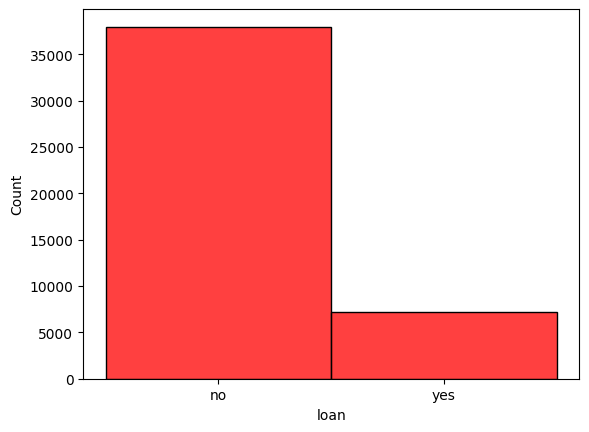

In [ ]:
print(df.housing.value_counts())
print(df.loan.value_counts())
sns.histplot(df['loan'],color = 'red')

<Axes: ylabel='campaign'>

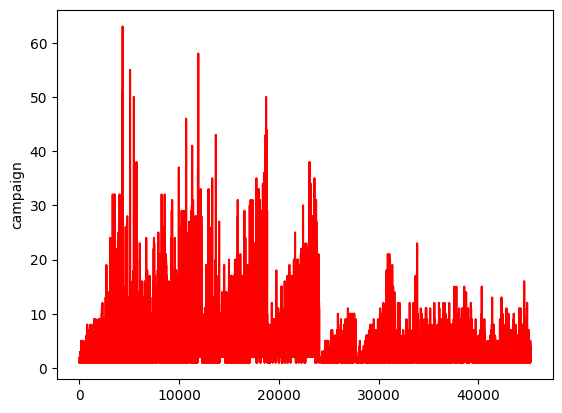

In [ ]:
sns.lineplot(df['campaign'],color = 'red')

<Axes: xlabel='poutcome', ylabel='Count'>

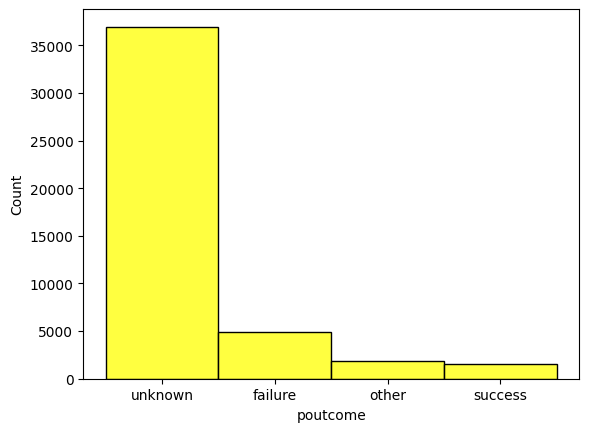

In [ ]:
df.poutcome.value_counts()
sns.histplot(df['poutcome'],color = 'yellow')

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Data is imbalanced so we may balance it later to get good results.

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


<Axes: xlabel='contact', ylabel='Count'>

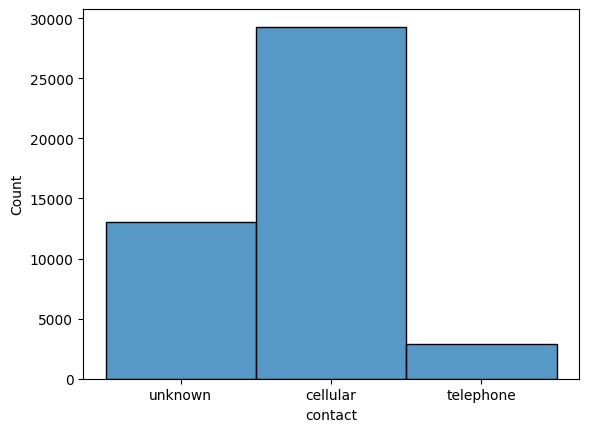

In [ ]:
print(df['contact'].value_counts())
sns.histplot(df['contact'])

**BIVARIATE ANALYSIS**

<Axes: xlabel='education', ylabel='age'>

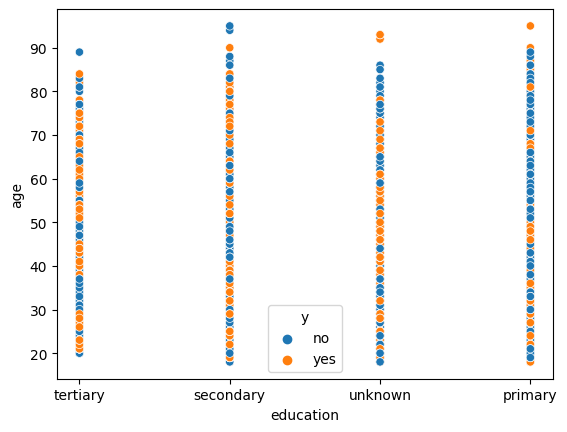

In [ ]:
sns.scatterplot(data=df, y='age', x='education',hue='y')

observation:It has been observed that term deposit subscribed by customers of higher education is comparively higher than others.Moreover term deposit by primary educated
person is very less.so bank should also focussed on that sector person to get knowledge and benefits of term deposit.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes')][['default','housing','loan','education','contact']]

,default,housing,loan,education,contact
572,yes,yes,yes,primary,unknown
852,yes,yes,yes,tertiary,unknown
932,yes,yes,yes,secondary,unknown
1197,yes,yes,yes,primary,unknown
1653,yes,yes,yes,tertiary,unknown
...,...,...,...,...,...
37255,yes,yes,yes,secondary,cellular
38119,yes,yes,yes,tertiary,cellular
38244,yes,yes,yes,secondary,cellular
39290,yes,yes,yes,secondary,cellular


In [ ]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes') & (df['contact']=='unknown')][['default','housing','loan','education','contact']]

,default,housing,loan,education,contact
572,yes,yes,yes,primary,unknown
852,yes,yes,yes,tertiary,unknown
932,yes,yes,yes,secondary,unknown
1197,yes,yes,yes,primary,unknown
1653,yes,yes,yes,tertiary,unknown
1777,yes,yes,yes,secondary,unknown
1822,yes,yes,yes,secondary,unknown
1896,yes,yes,yes,tertiary,unknown
1993,yes,yes,yes,secondary,unknown
2113,yes,yes,yes,unknown,unknown


**Observation : Highly insightful data as these are the customers who has taken loan ,housing loan, and are defaulter also and has unknown number means the primary focus and investigation should be done.**

In [ ]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes') & (df['contact']=='unknown')].shape[0]

52

** Total 52 such customers exists which are defaulted in every sector**

In [ ]:
df1 = df.groupby('contact')['balance'].sum().sort_values(ascending=False)
df1

contact
cellular     40938292
unknown      15409826
telephone     5241564
Name: balance, dtype: int64

Observation : Above values shows that the person having unknown phone number has huge amount of balance even more than the person having telephone.This is a check point.

In [ ]:
df.pdays.value_counts().sort_values(ascending=False).head(20)

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
Name: pdays, dtype: int64

Observation : The above data reveals that 167,(right hand side) customers has not been contacted since 182 days by any bank staff and following on'

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df[(df['pdays'] > 300) & (df['default'] == 'yes')][['contact','balance','job','pdays','default']]

,contact,balance,job,pdays,default
31562,cellular,-60,blue-collar,332,yes
32824,cellular,-274,blue-collar,329,yes
32865,cellular,879,management,344,yes
34329,cellular,-148,blue-collar,357,yes
34415,cellular,-947,blue-collar,362,yes
34767,cellular,-1083,self-employed,336,yes
34856,cellular,-18,admin.,359,yes
34979,cellular,-92,technician,363,yes
35176,cellular,87,blue-collar,345,yes
35440,cellular,-1,management,349,yes


Observation : In the above analysis it is clearly visible that above customer has cellular phone and few are in high position also but defaulter and has phones but not contacted since one year.Bank has to look after this.

In [ ]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<Axes: >

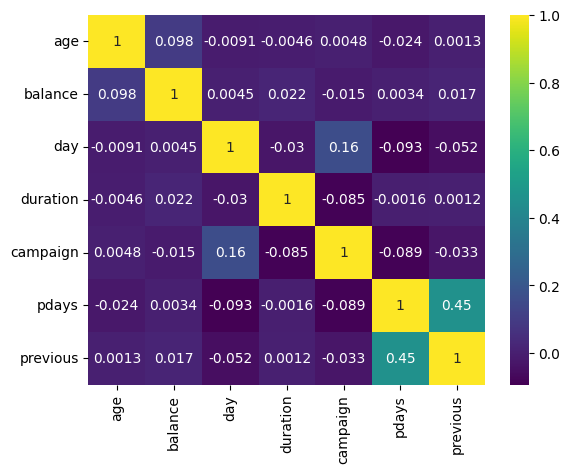

In [ ]:
sns.heatmap(df.corr(),annot = True,cmap='viridis')

**CHECKING FOR OUTLIERS**

In [ ]:
X = df.drop(columns = ['y'])
y = df['y']

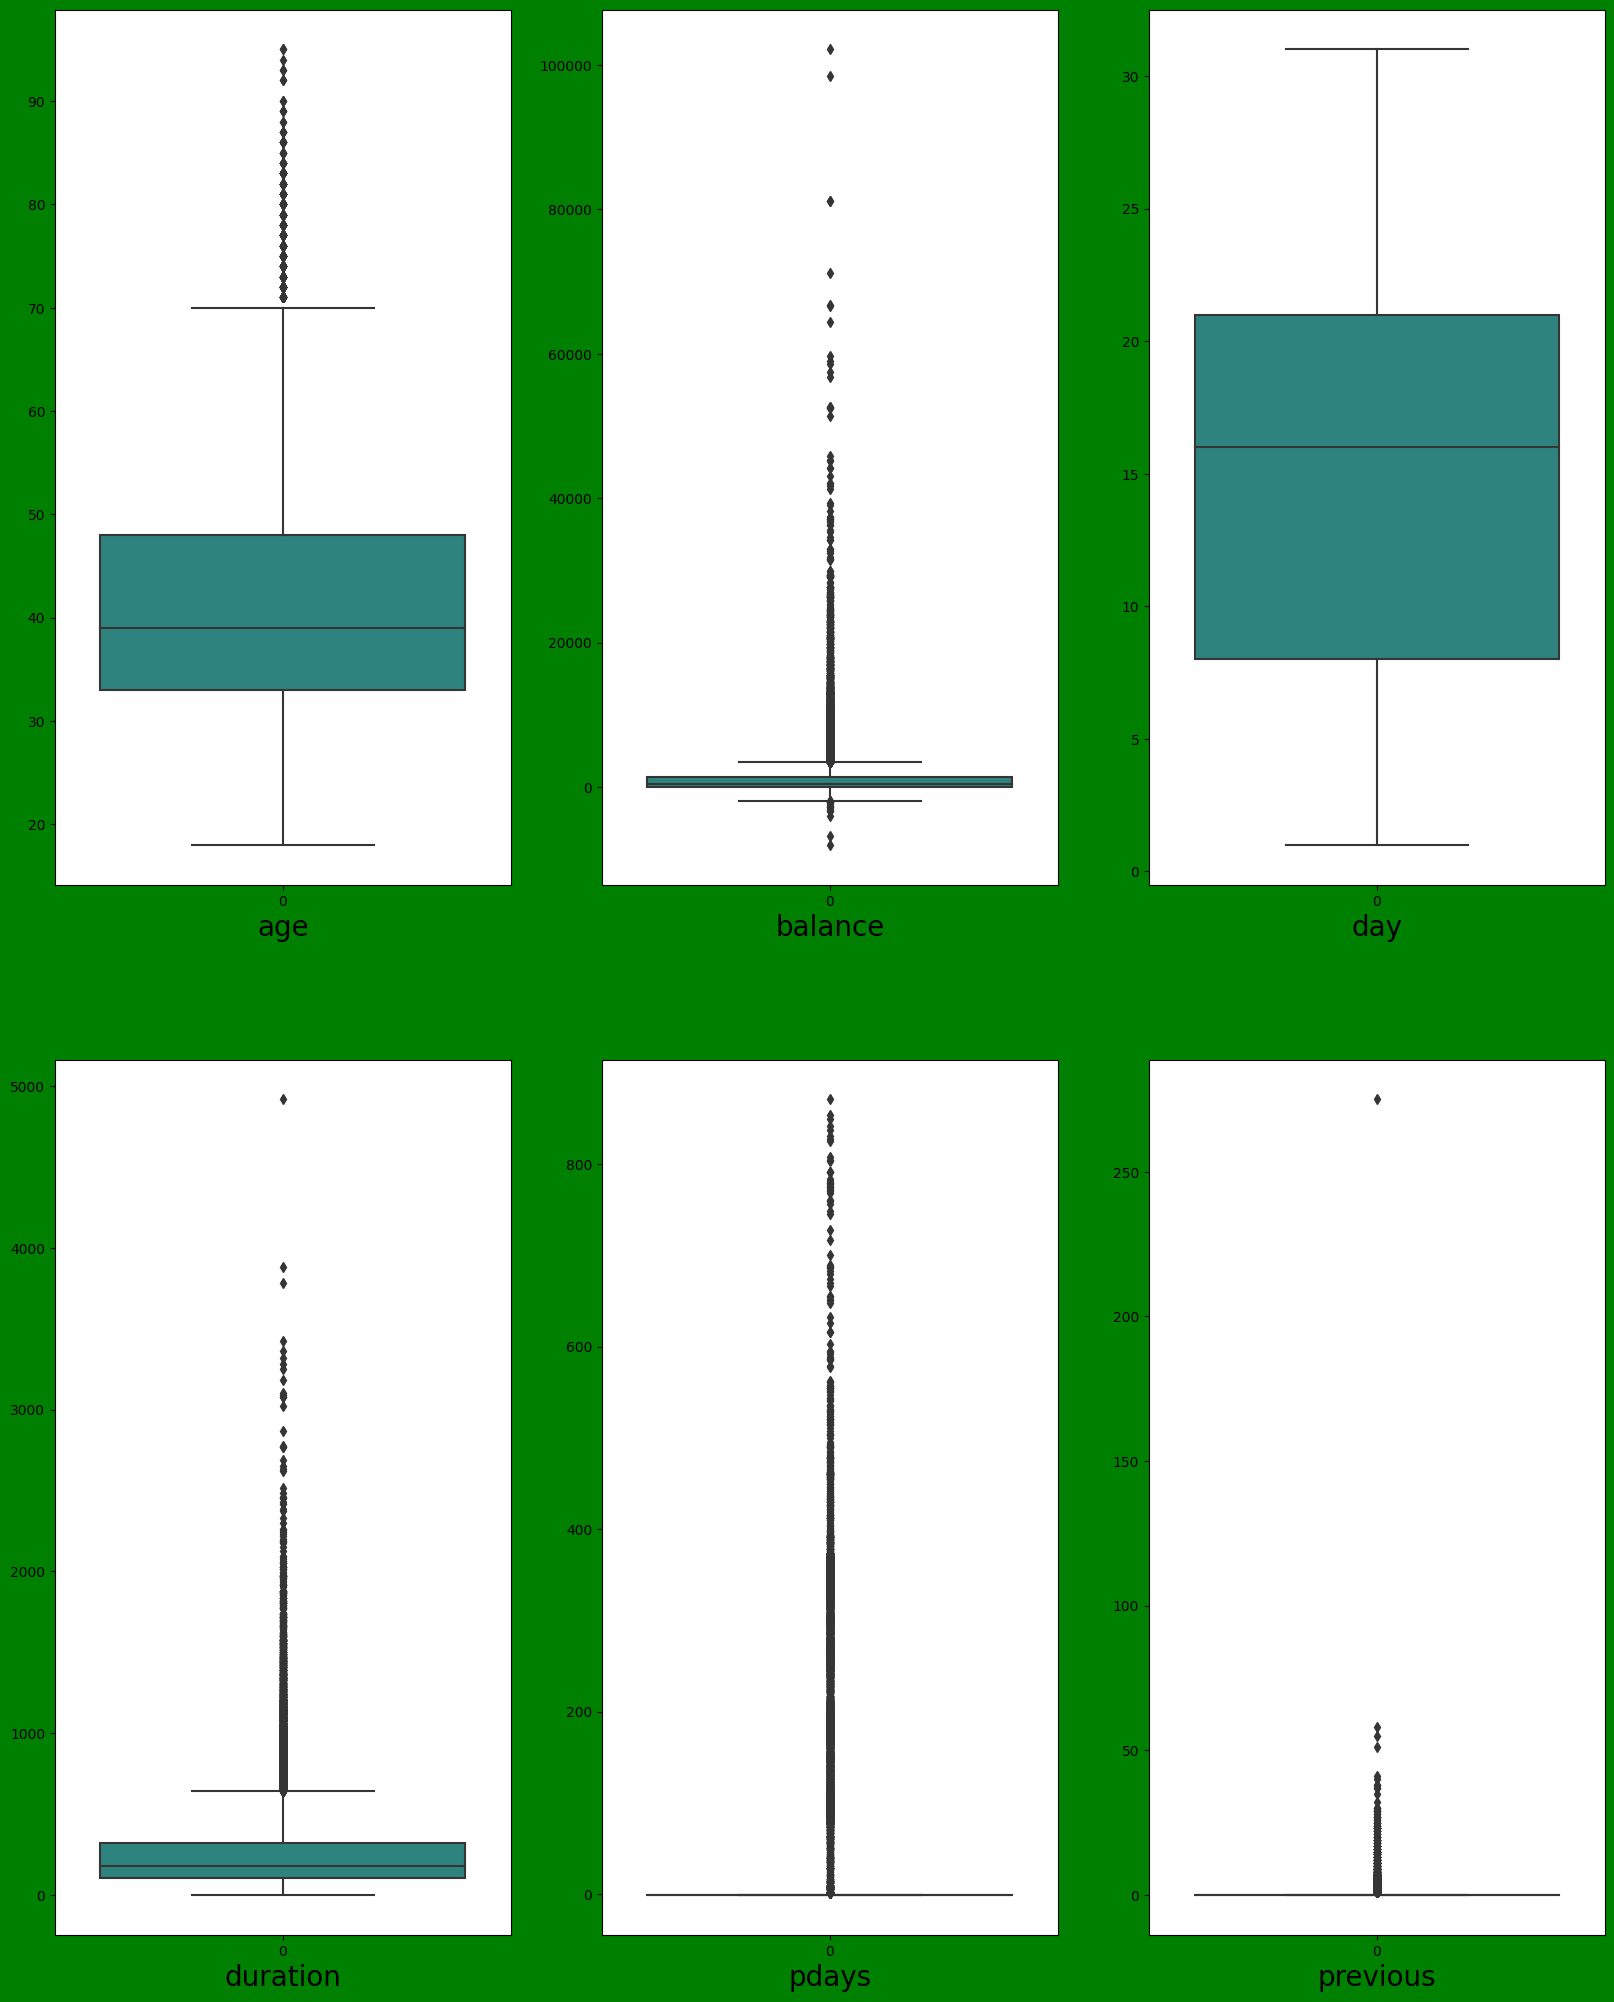

In [ ]:
plt.figure(figsize=(20,25),facecolor='green')
plot_num=1
for col in X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month', 'campaign',
        'poutcome']):
    if plot_num<=8:
        plt.subplot(2,3,plot_num)
        sns.boxplot(X[col], palette='viridis')
        plt.xlabel(col,fontsize=20)
    plot_num+=1
plt.show()

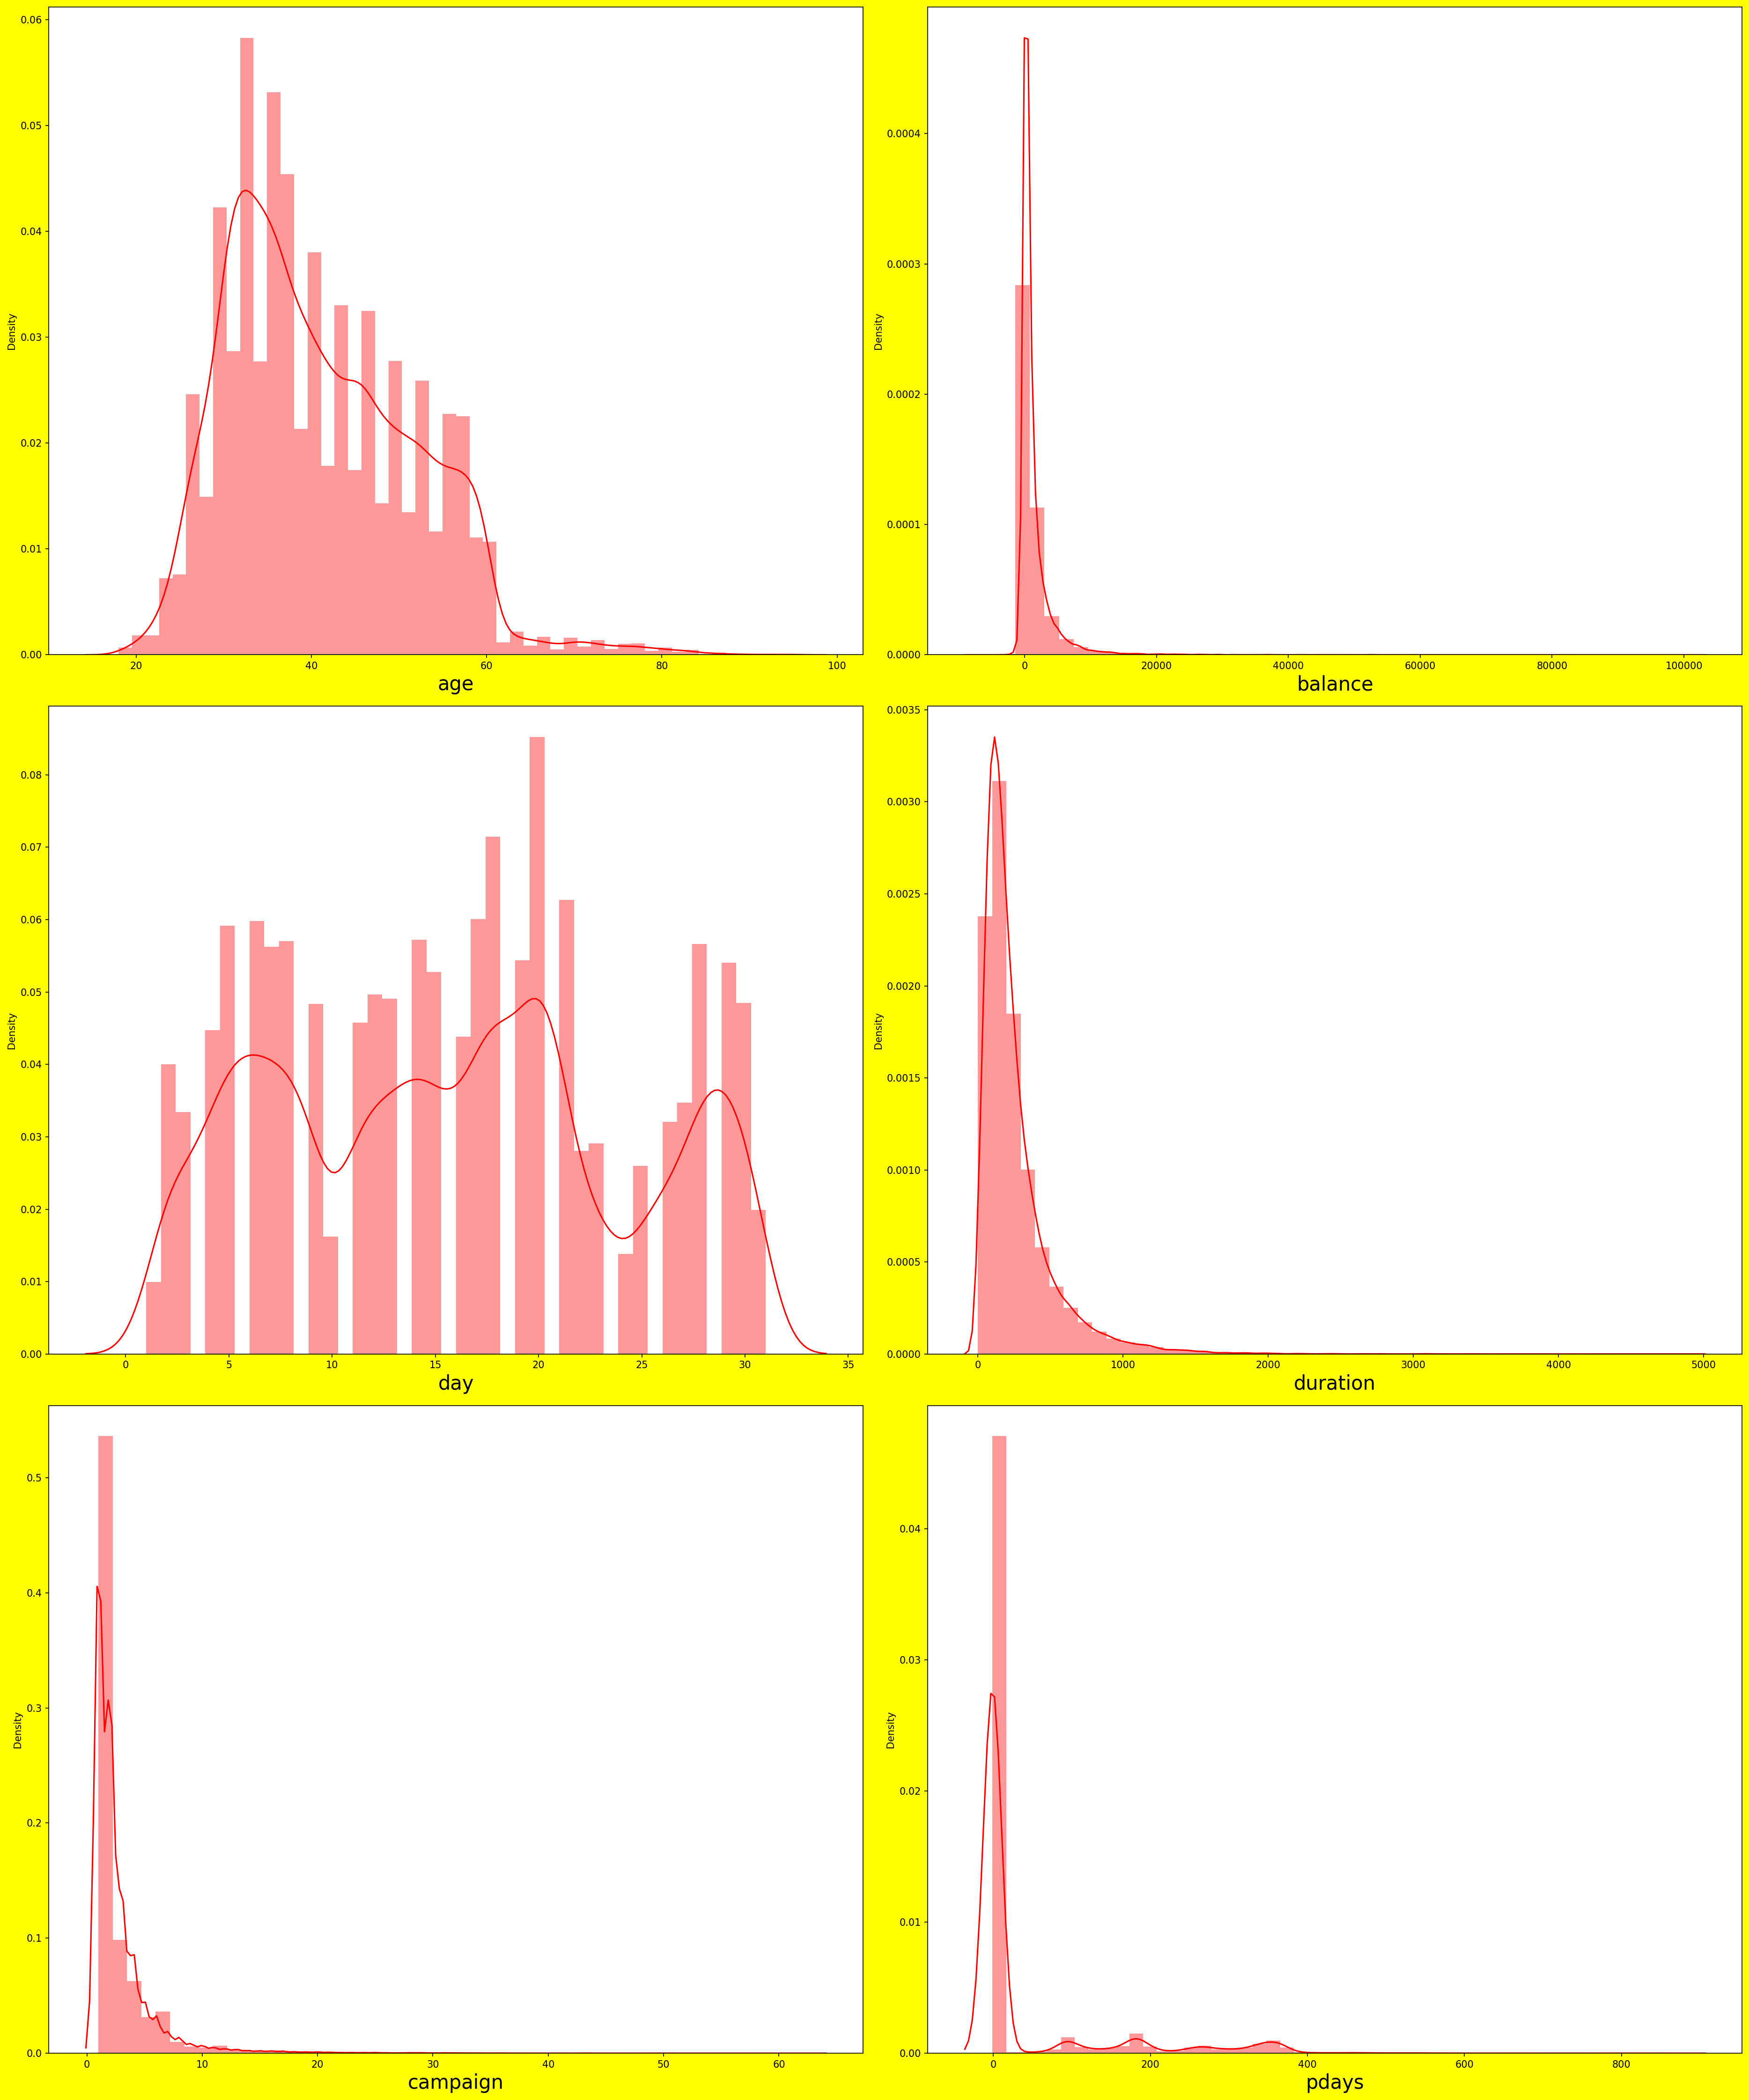

In [ ]:
#Checking how data is distributed for every column.
plt.figure(figsize = (25,30),facecolor='yellow',dpi=150)

plotnumber = 1

for col in X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month',
        'poutcome']):
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(X[col], color = 'r')
        plt.xlabel(col, fontsize = 20)

    plotnumber += 1

plt.tight_layout()

In [ ]:
df2 =X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month',
        'poutcome']).copy()

In [ ]:
df.shape

(45211, 17)

In [ ]:
X = df.drop(columns = ['y'])
y = df['y']

In [ ]:
X.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

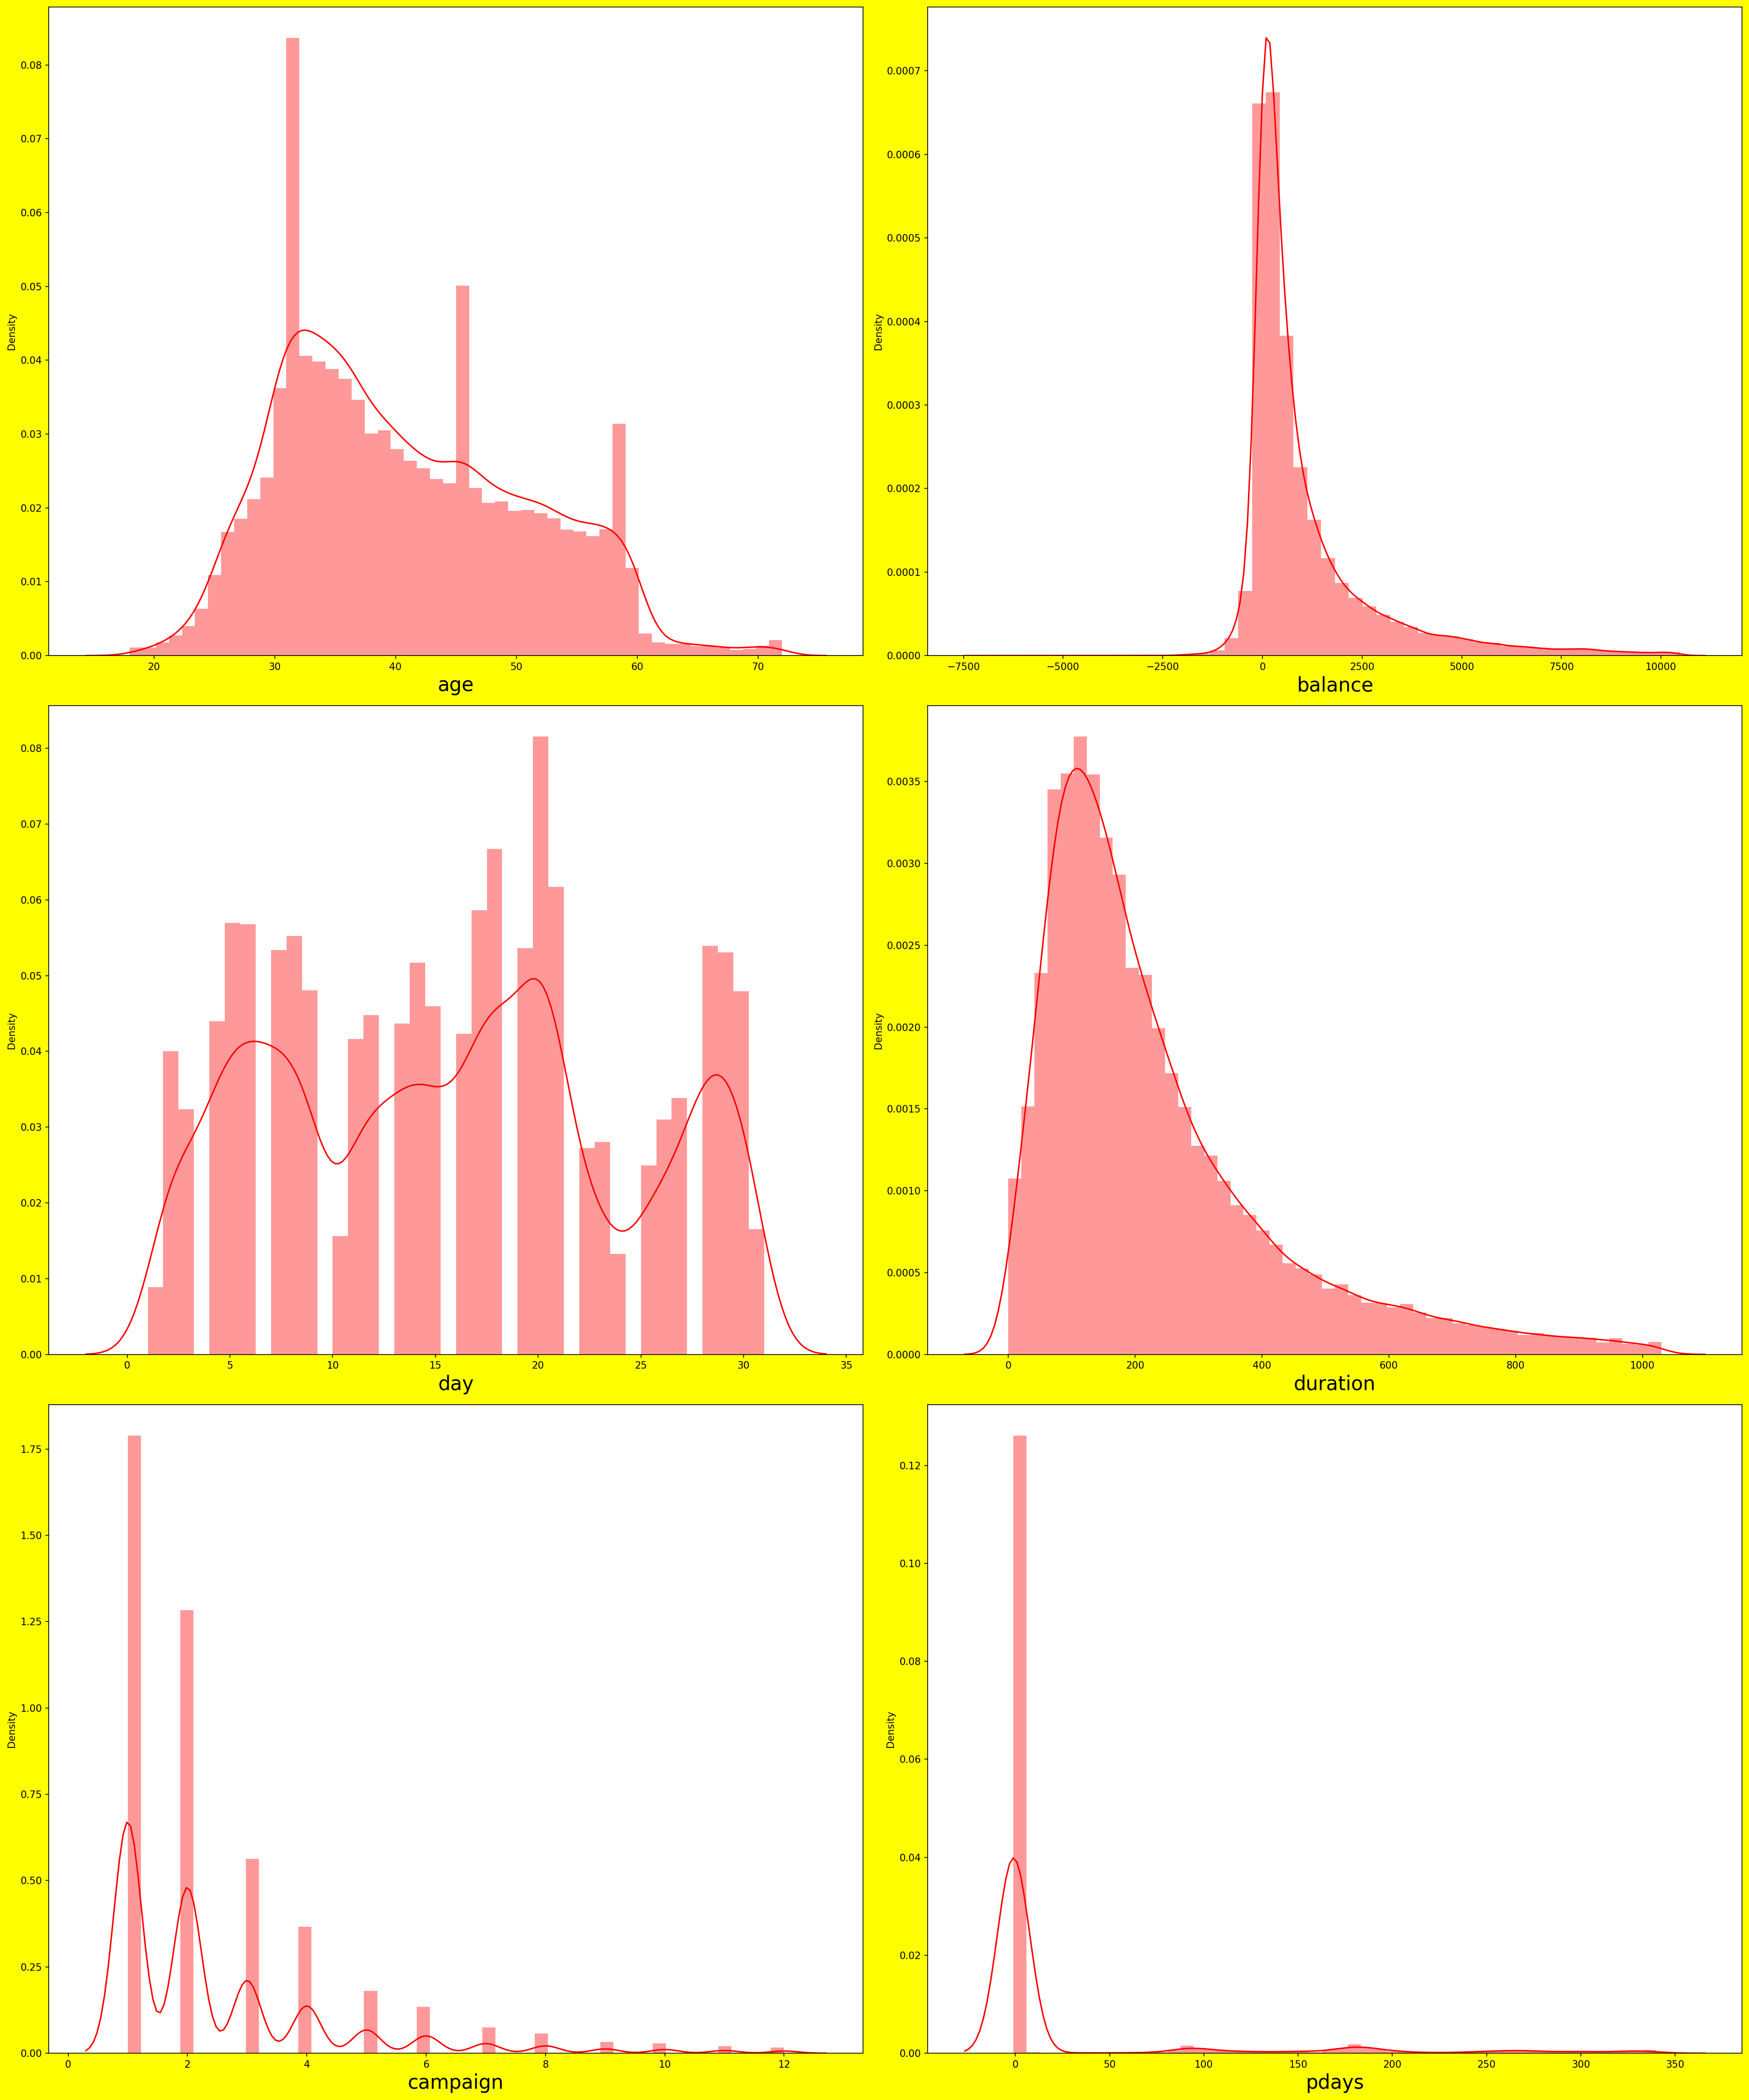

In [ ]:
#Checking how data is distributed for every column.
plt.figure(figsize = (25,30),facecolor='yellow',dpi=150)

plotnumber = 1

for col in X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month',
        'poutcome']):
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(X[col], color = 'r')
        plt.xlabel(col, fontsize = 20)

    plotnumber += 1

plt.tight_layout()

More or less graph also shows normal distribution.But some skweness observed so further applying to make it perfect.

In [ ]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [ ]:
df5 = X[['age', 'balance', 'day', 'duration','campaign','pdays','previous']]
transformed= powtrans.fit_transform(df5)
transformed = pd.DataFrame(transformed, columns=df5.columns)
transformed.skew()


age        -0.013812
balance    -3.658788
day        -0.015950
duration   -0.019367
campaign    0.100103
pdays       1.642896
previous    1.646051
dtype: float64

In [ ]:
transformed.index = X.index

In [ ]:
X[['age', 'balance', 'day', 'duration','campaign','pdays','previous']] = transformed

In [ ]:
X.skew()

age        -0.013812
balance    -3.658788
day        -0.015950
duration   -0.019367
campaign    0.100103
pdays       1.642896
previous    1.646051
dtype: float64

ENCODING THE CATEGORICAL COLUMN

In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
def deposit1(y):
    if(y=='yes'):
        return(1)
    elif(y=='no'):
        return(0)
df['term_deposit'] = df['y'].apply(deposit1)

In [ ]:
df=df.drop(['y'],axis=1)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
object = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month',  'poutcome']

In [ ]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [ ]:
#Tranforming object data using Label Encoder
for i in object:
    df[i] = lab_enc.fit_transform(df[i])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
#Spliting dataset into X and Y
X = df.drop(columns = ['term_deposit'])
y = df['term_deposit']

# FEATURE SCALING USING STANDARD SCALER

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x=pd.DataFrame(x_scaled,columns=X.columns)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


USING VIF TO CHECK MULTICOLLINEARITY

In [ ]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.279310,age
1,1.049332,job
2,1.218279,marital
3,1.066491,education
4,1.011706,default
5,1.032463,balance
6,1.190106,housing
7,1.020907,loan
8,1.319594,contact
9,1.039638,day


[0.09798043 0.05887896 0.02757022 0.03449319 0.00277436 0.09227281
 0.02462721 0.01038146 0.02575605 0.09345287 0.09566383 0.25460232
 0.05906164 0.03988763 0.02437691 0.05822009]


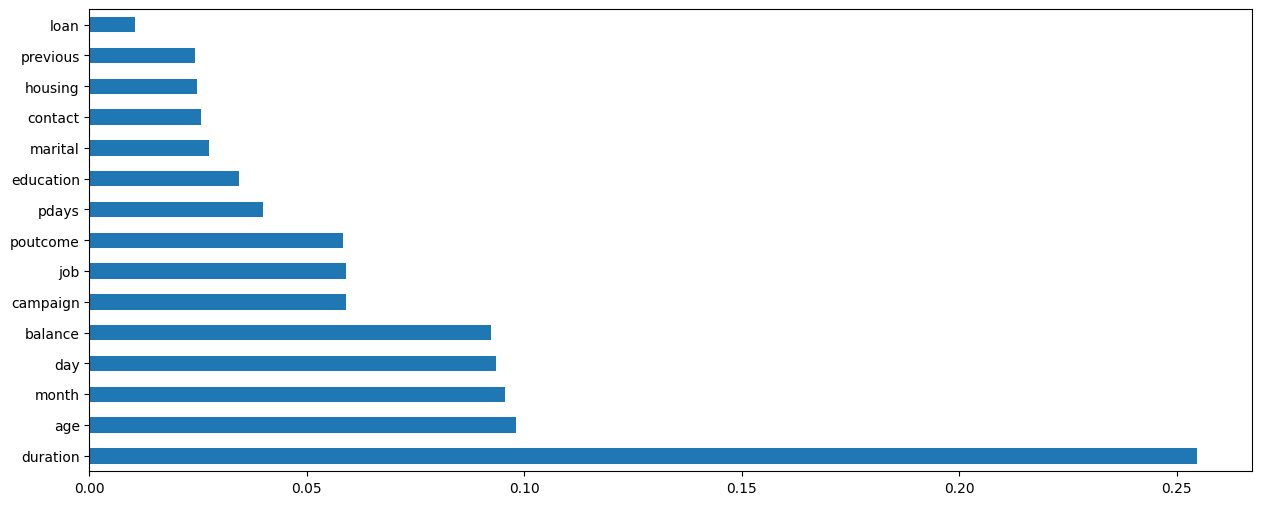

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
##use inbuilt class feature_importances of tree based classifiers
print(selection.feature_importances_)
# for plotting
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show();

**Checking For imbalance in data**

In [ ]:
y.value_counts()

0    39922
1     5289
Name: term_deposit, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [ ]:
y.value_counts()

0    39922
1    39922
Name: term_deposit, dtype: int64

Target variable has been balanced.

# **APPLYING MACHINE LEARNING MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=10,stratify=y)

In [ ]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(40,100):
         x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
         clf.fit(x_train,y_train)
         pred=clf.predict(x_test)
         accuracy_check=accuracy_score(y_test,pred)
         if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## **1.LOGISTIC REGRESSION**

max accuracy score corresponding to 59 is 81.77093117915962


cross validation score 76.9812252722616


Standard Deviation 6.64568447389738


F1 score 81.18688442837552


Training accuracy 81.32759295499021


Test Accuracy 81.10088296073643


Confusion Matrix [[6439 1545]
 [1473 6512]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.81      0.81      7984
           1       0.81      0.82      0.81      7985

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969



Roc_auc Score 81.10085465232282





59

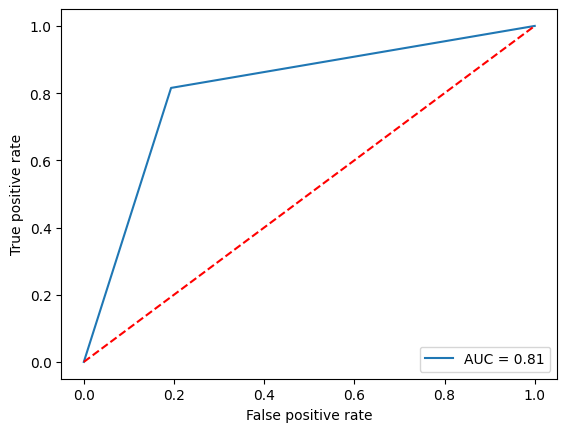

In [ ]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

# **RANDOM FOREST MODEL**

max accuracy score corresponding to 68 is 95.42238086292191


cross validation score 79.39339415257342


Standard Deviation 7.960380246331996


F1 score 94.96491444047767


Training accuracy 100.0


Test Accuracy 94.8775753021479


Confusion Matrix [[7437  547]
 [ 271 7714]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.93      0.95      7984
           1       0.93      0.97      0.95      7985

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



Roc_auc Score 94.87746705056952





68

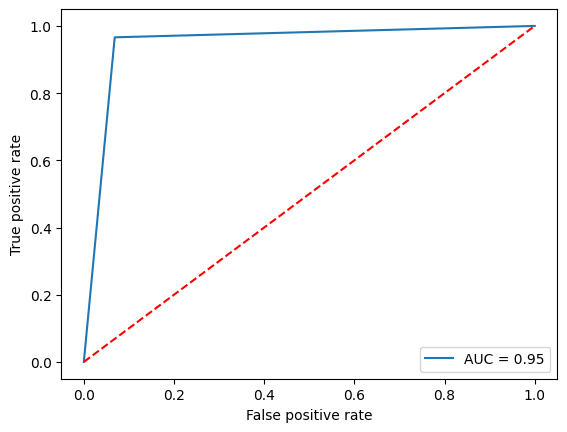

In [ ]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

#**KNN MODEL**

max accuracy score corresponding to 50 is 92.36646001628155


cross validation score 79.44102644201297


Standard Deviation 6.753394943625246


F1 score 92.25926789461413


Training accuracy 93.87553816046966


Test Accuracy 91.68388753209344


Confusion Matrix [[6727 1257]
 [  71 7914]]


Classification Report               precision    recall  f1-score   support

           0       0.99      0.84      0.91      7984
           1       0.86      0.99      0.92      7985

    accuracy                           0.92     15969
   macro avg       0.93      0.92      0.92     15969
weighted avg       0.93      0.92      0.92     15969



Roc_auc Score 91.68342241778485





50

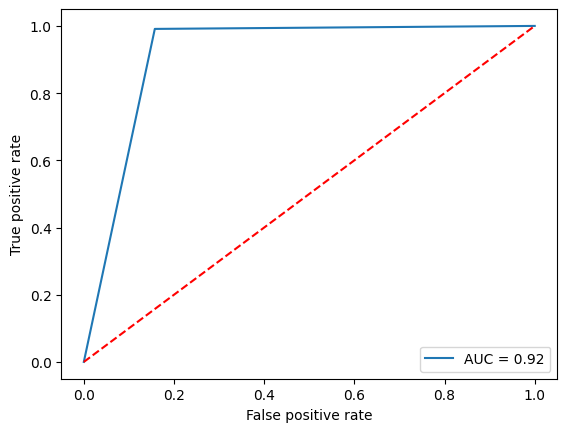

In [ ]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# ADA BOOSTING MODEL

max accuracy score corresponding to 45 is 88.98490825975327


cross validation score 76.40390681795678


Standard Deviation 5.024209166803064


F1 score 88.38138025708223


Training accuracy 88.6481409001957


Test Accuracy 88.33990857285991


Confusion Matrix [[7025  959]
 [ 903 7082]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.88      0.88      7984
           1       0.88      0.89      0.88      7985

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



Roc_auc Score 88.33988656712297





45

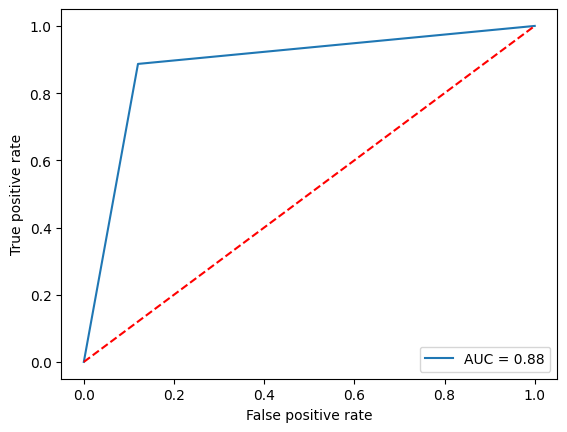

In [ ]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

## GRADIENT BOOSTING MODEL

max accuracy score corresponding to 64 is 91.99699417621642


cross validation score 77.93309347105509


Standard Deviation 7.643378035188027


F1 score 91.57991992608561


Training accuracy 91.57416829745597


Test Accuracy 91.4396643496775


Confusion Matrix [[7168  816]
 [ 551 7434]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.90      0.91      7984
           1       0.90      0.93      0.92      7985

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969



Roc_auc Score 91.4395603981915





64

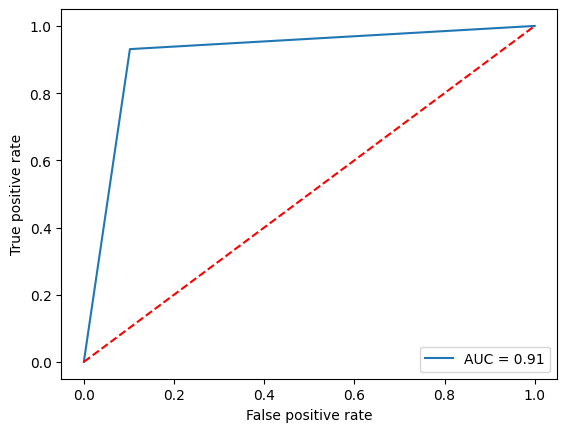

In [ ]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

# **HYPERTUNING THE RANDOM FOREST MODEL**

In [ ]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[12,15,17,18],
    'criterion':['gini','entropy'],
    'max_depth':[10,15,17],
    'min_samples_leaf':[5,6,7,8],
    'min_samples_split':[10,11,12,13],
}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 18}


In [ ]:
RFR_model = grd.best_estimator_
RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=5,
                       min_samples_split=13, n_estimators=18)

In [ ]:
#Model Confidence/Accuracy
print('Accuracy_Score of  Random Forest Model is', accuracy_score(y_test,RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Random Forest model is ",cross_val_score(RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() *100)

Accuracy_Score of  Random Forest Model is 92.12223683386561
Cross Validation accuracy score of Random Forest model is  78.07833354102532


In [ ]:
#Saving the best model to the local file system

import pickle
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('BANK_model', 'wb'))

In [ ]:
#Loading saved model
loaded_model = pickle.load(open('BANK_model','rb'))

In [ ]:
Banking_model = loaded_model.predict(x_test)
Banking_model


array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
term_deposit = pd.DataFrame({'Actual term_deposit': y_test, 'Predicted term_deposit': Banking_model})
term_deposit.head()

,Actual term_deposit,Predicted term_deposit
12912,0,0
71755,1,1
54334,1,1
797,0,0
15614,0,0


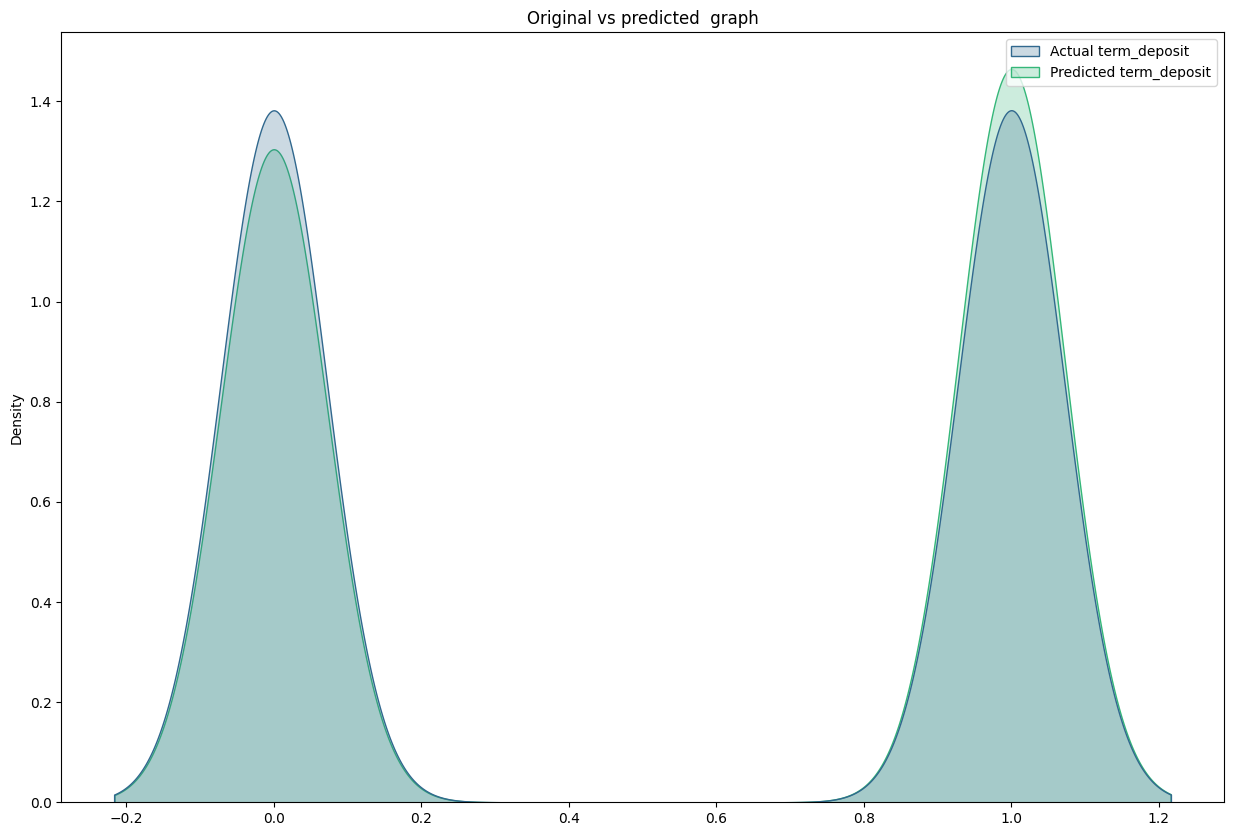

In [ ]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = term_deposit, palette = 'viridis', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# --------ACTUAL AND PREDICTED RESULTS ARE WORKING WELL-----------
# -------=PROJECT FINISHED ---------------------------------------